# 6.5 Lab 1: Subset Selection Methods

In [49]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

imposklearnplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations

## 6.5.1 Best Subset Selection

In [2]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Hitters.csv')
print(data.shape)
data.head()

(322, 21)


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# counting the missing observations in salary
data['Salary'].isnull().sum()

59

In [4]:
# removing or dropping the observations with null values
data.dropna(inplace = True)

In [5]:
print('Shape of data after dropiing na is ',data.shape)

Shape of data after dropiing na is  (263, 21)


In [6]:
qual_variables = [col for col in data.columns if data[col].dtype == 'O']
print('Qualitative variables are - ',qual_variables)
# The first col, unnamed 0, represents the name and is not useful for our current purpose
# one hot encoding the qualitatve variables
data = pd.get_dummies(data,columns = qual_variables[1:],drop_first=True)

Qualitative variables are -  ['Unnamed: 0', 'League', 'Division', 'NewLeague']


In [7]:
data.drop(qual_variables[0],axis = 1,inplace = True)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


https://xavierbourretsicotte.github.io/subset_selection.html

In [8]:
# There is no similar  built in function as regsubset in python, therefore we will create one.
# the reference is from the link that is mentioned above.

In [9]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    

In [10]:
from tqdm import tnrange, tqdm_notebook


#Initialization variables
Y = data['Salary']
X = data.drop(columns = 'Salary', axis = 1)
k = 19
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [13]:
# My PC was not fast enough to run the above code in even an hour, SO, i will leave it here.
# Although what you need to do is to sort the df, on the basis of RSS, than figure out what are the num_features, with lowest
# RSS, DO the same for R_squared.

## 6.5.2 Forward and Backward Stepwise Selection

In [14]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [15]:
def forward_stepwise_selection(data,target):
    total_features = [[]]
    score_dict = {}
    remaining_features = [col for col in data.columns if not col == target]
    for i in range(1,len(data.columns)):
        best_score = 0;best_feature = None
        for feature in remaining_features:

            X = total_features[i-1] + [feature]
            model = LinearRegression().fit(data[X],data[target])
            score = r2_score(data[target],model.predict(data[X]))
#             print('For len {}, feature - {}, score is {}'.format(i,feature,score))

            if score > best_score:
                best_score = score
                best_feature = feature
        total_features.append(total_features[i-1] + [best_feature])
        remaining_features.remove(best_feature)
        score_dict[i] = best_score
    return total_features,score_dict

In [19]:
total_features_fwd,score_dict_fwd = forward_stepwise_selection(data,'Salary')

In [56]:
# lets print the selceted features for first 5 models
for i in range(1,len(total_features_fwd)-1):
    print('The best model with {} features - {}'.format(i,total_features_fwd[i]))
    print('R_2 score is ',score_dict_fwd[i])
    print()

The best model with 1 features - ['CRBI']
R_2 score is  0.3214500886678947

The best model with 2 features - ['CRBI', 'Hits']
R_2 score is  0.42522374646677885

The best model with 3 features - ['CRBI', 'Hits', 'PutOuts']
R_2 score is  0.45142941571795725

The best model with 4 features - ['CRBI', 'Hits', 'PutOuts', 'Division_W']
R_2 score is  0.47540665339478694

The best model with 5 features - ['CRBI', 'Hits', 'PutOuts', 'Division_W', 'AtBat']
R_2 score is  0.4908036159635182

The best model with 6 features - ['CRBI', 'Hits', 'PutOuts', 'Division_W', 'AtBat', 'Walks']
R_2 score is  0.5087145573589967

The best model with 7 features - ['CRBI', 'Hits', 'PutOuts', 'Division_W', 'AtBat', 'Walks', 'CWalks']
R_2 score is  0.5132286393324802

The best model with 8 features - ['CRBI', 'Hits', 'PutOuts', 'Division_W', 'AtBat', 'Walks', 'CWalks', 'CRuns']
R_2 score is  0.5281385504329165

The best model with 9 features - ['CRBI', 'Hits', 'PutOuts', 'Division_W', 'AtBat', 'Walks', 'CWalks', 'C

Text(0.5, 1, 'Forward Selection')

<Figure size 864x432 with 0 Axes>

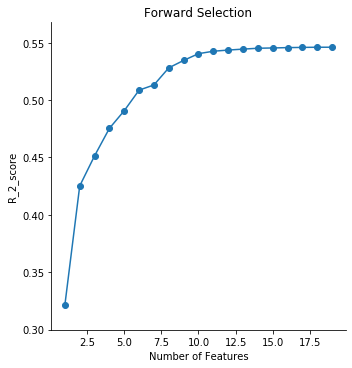

In [68]:
# this looks a bit boring to read. Lets plot the results of the above text
temp = pd.DataFrame({'Number of Features':np.arange(1,len(total_features_fwd)),'R_2_score':list(score_dict_fwd.values())})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'Number of Features' , 'R_2_score')
g.map(plt.plot, 'Number of Features', 'R_2_score')
plt.xticks = list(np.arange(1,len(total_features_fwd)))
plt.title('Forward Selection')


In [58]:
# we can see from the above graph that as the number of features increases, the value of R2 increases.
# If we choose this metric to choose the best model amonf all the size, we would always end up choosing the model with 
# highest features, however, we know that this is not the case, therefore we will use some other metrics to select the model.

### Using cross validation to choose which model is best

### validation approach

In [60]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('Salary',axis = 1),data['Salary'],test_size = 0.2,random_state = 1)

In [83]:
validation_approach_score = {}
for features in total_features_fwd[1:]:
    model = LinearRegression()
    model.fit(X_train[features],y_train)
    score = mean_squared_error(y_test,model.predict(X_test[features])) * len(y_test)
    validation_approach_score[len(features)] = score

Text(0.5, 1.0, 'Validatoin Approach')

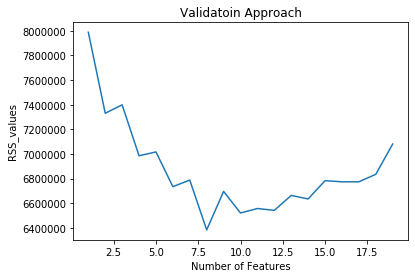

In [84]:
sns.lineplot(np.arange(1,len(total_features_fwd)),list(validation_approach_score.values()))
plt.xlabel('Number of Features')
plt.ylabel('RSS_values')
plt.title('Validatoin Approach')

In [77]:
# THe lowest value of r2 is for the model having 8 features, which is quite different from the book.
# In the book it was the model with 10 features that was selected.

In [85]:
# --OPTIONAL--
# Lets try and use adjusted r2 to select the best modekl
# We calcualte adjusted r2 on the training set only
# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2_score = {}
for features in total_features_fwd[1:]:
    model = LinearRegression()
    model.fit(data[features],data['Salary'])
    score = r2_score(model.predict(data[features]),data['Salary']) 
    p = len(features)
    n = len(data)
    adj_r2 = 1-(1-score)*(n-1)/(n-p-1)
    adj_R2_score[len(features)] = adj_r2

Text(0.5, 1.0, 'ADJUSTED R2 VALUES')

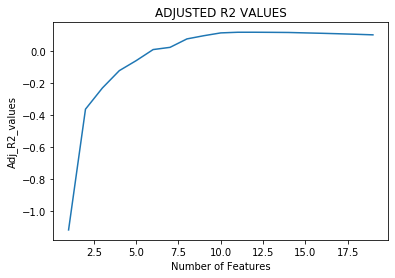

In [86]:
sns.lineplot(np.arange(1,len(total_features_fwd)),list(adj_R2_score.values()))
plt.xlabel('Number of Features')
plt.ylabel('Adj_R2_values')
plt.title('ADJUSTED R2 VALUES')

In [88]:
# Using this approach we get the best model as model with 12 features